### **Técnicas de procesamiento de datos para el análisis estadístico y para la construcción de modelos**

 **Angeles Arista Huerta** */  SEPTIEMBRE 2022*

*Entrega - Caso de negocios, módulo 1 - Estadística*

###### **DESCRIPCIÓN DEL CASO**
###### *Usted fue contratado como científico de datos en una importante empresa de fondos de inversión en el departamento de análisis financiero. La firma lleva varios años realizando análisis financieros y previsiones financieras. Le contrataron para que ideara enfoques alternativos para realizar análisis descriptivos con el fin de encontrar mejores alternativas futuras para los métodos de previsión.*

###### *Usted tiene que analizar los estados financieros trimestrales históricos de todas las firmas públicas estadounidenses que cotizan en la Bolsa de Nueva York y NASDAQ. Recibirá este conjunto de datos en formato .csv.*

---

#### *Procesamiento del dataset*

In [ ]:
# importar librerias
import numpy as np              #Algebra lieal
import pandas as pd             #Procesamiento de datos
import seaborn as sns           #Graficas/Visualizacion
import matplotlib.pyplot as plt #Graficas/Visualizacion

In [ ]:
# acceso a directorio
%cd "c:\Users\angix\Downloads\Estadistica"
#%ls 

###### Lectura de los archivos csv

In [ ]:
# Lectura csv de firms
firms = pd.read_csv("c:\\Users\\angix\\Downloads\\Statistics\\usfirms2022.csv")
#firms.head(3)

In [ ]:
# Lectura csv de us
us = pd.read_csv("c:\\Users\\angix\\Downloads\\Statistics\\us2022q2a.csv")
#us.head(3)

In [ ]:
# Configuración de la visualización de datos a 3 decimales
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.3f}'.format

###### Descripción de los datos

In [ ]:
firms.info()
firms.describe()

In [ ]:
us.info()
us.describe()

---

#### *Limpieza y modificación de datos*

1. Verificar que no existan datos nulos, duplicados

2. Si no impacta en la dataset, eliminarlos o modificarlos

In [ ]:
# Datos nulos en el csv
us.isna().sum() 
us.isnull().sum()

In [ ]:
# Eliminar datos nulos
us = us.drop(index=324446,axis=0) #Eliminar fila con datos nulos

In [ ]:
# Datos duplicados en el csv
us[us.duplicated()]

---

#### *Analisis del dataset*

***Preguntas Generales***

>###### Por industria, ¿cuál es la composición de las empresas públicas estadounidenses en términos de tamaño de la empresa, rendimiento de las ventas y rentabilidad?
###### **RESPUESTA.**

>###### ¿Por qué algunas empresas son más rentables que otras? ¿Qué factores/variables de los estados financieros están relacionados con los rendimientos de las acciones?
###### **RESPUESTA.**

---

***Preguntas Especificas***

*Estadistica descriptiva*

Considerando el trimestre financiero más reciente del conjunto de datos:

>###### Mostrar cuántas empresas por industria hay en la muestra

In [ ]:
# Merge
US_Firms = firms.merge(us, left_on='Ticker', right_on='firm')
US_Firms = US_Firms.drop(["N", "Class", "Country\nof Origin", "Type of Asset", "Exchange / Src", "Sector\nEconomatica", "Sector NAICS\nlast available", "partind"], axis = 1)
US_Firms.head(0)

In [ ]:
US_Firms['q'] = pd.PeriodIndex(US_Firms['q'],freq = "q")
US_Firms.set_index(['firm','q'],inplace=True)

In [509]:
US_Firms

Ticker                   Name Sector NAICS\nlevel 1    revenue  \
firm q                                                                       
FLWS 2000Q1   FLWS  1 800 Flowers Com Inc          Retail Trade  85045.000   
     2000Q2   FLWS  1 800 Flowers Com Inc          Retail Trade 123288.000   
     2000Q3   FLWS  1 800 Flowers Com Inc          Retail Trade  72516.000   
     2000Q4   FLWS  1 800 Flowers Com Inc          Retail Trade 134243.000   
     2001Q1   FLWS  1 800 Flowers Com Inc          Retail Trade 103221.000   
...            ...                    ...                   ...        ...   
ZNGA 2021Q2   ZNGA              Zynga Inc           Information 720000.000   
     2021Q3   ZNGA              Zynga Inc           Information 704700.000   
     2021Q4   ZNGA              Zynga Inc           Information 695500.000   
     2022Q1   ZNGA              Zynga Inc           Information 691200.000   
     2022Q2   ZNGA              Zynga Inc           Information        NaN   

                  cogs       sgae  otheropexp  extraincome    finexp  \
firm q                                                                 
FLWS 2000Q1  54143.000  52146.000       0.000      111.000 -1600.000   
     2000Q2  75607.000  63201.000       0.000       27.000 -2164.000   
     2000Q3  45091.000  51590.000       0.000       88.000 -1576.000   
     2000Q4  79099.000  67206.000       0.000      335.000 -1191.000   
     2001Q1  64020.000  48856.000       0.000       76.000 -1069.000   
...                ...        ...         ...          ...       ...   
ZNGA 2021Q2 253300.000 391900.000       0.000    -9100.000 13000.000   
     2021Q3 240800.000 409400.000   66800.000     -600.000 13200.000   
     2021Q4 260100.000 436600.000       0.000   -10400.000 13600.000   
     2022Q1 252200.000 424000.000       0.000   -15700.000  2200.000   
     2022Q2        NaN        NaN         NaN          NaN       NaN   

             incometax  totalassets  totalliabilities  shortdebt    longdebt  \
firm q                                                                         
FLWS 2000Q1   -268.000   248461.000         76657.000   4380.000    8869.000   
     2000Q2   -419.000   224641.000         65723.000   1839.000    9441.000   
     2000Q3      0.000   211449.000         75163.000   7654.000   10916.000   
     2000Q4      0.000   213983.000         88231.000   2157.000   10452.000   
     2001Q1      0.000   200400.000         83160.000   4777.000   12318.000   
...                ...          ...               ...        ...         ...   
ZNGA 2021Q2  24900.000  6132200.000       3111600.000  17700.000 1457000.000   
     2021Q3  15600.000  6067700.000       3060700.000  17600.000 1467600.000   
     2021Q4  42100.000  6358900.000       3247000.000  17100.000 1477200.000   
     2022Q1  21600.000  5860000.000       2953900.000  17900.000 1673700.000   
     2022Q2        NaN          NaN               NaN        NaN         NaN   

             stockholderequity  adjprice  originalprice  sharesoutstanding  \
firm q                                                                       
FLWS 2000Q1         171804.000     7.125          7.125          64097.913   
     2000Q2         158918.000     5.125          5.125          64170.913   
     2000Q3         136286.000     4.984          4.984          64185.913   
     2000Q4         125752.000     4.125          4.125          64187.163   
     2001Q1         117240.000     8.000          8.000          64187.163   
...                        ...       ...            ...                ...   
ZNGA 2021Q2        3020600.000    10.630         10.630        1088762.805   
     2021Q3        3007000.000     7.530          7.530        1091890.649   
     2021Q4        3111900.000     6.400          6.400        1120181.490   
     2022Q1        2906100.000     9.240          9.240        1132408.337   
     2022Q2                NaN     8.180          8.180        1137273.677   

    

**PARA OBTENER EL VALOR DE MERCADO Y EL VALOR CONTABLE DE LA EMPRESA, ES NECESARIO EMPLEAR LOS SIGUIENTES CALCULOS:**

##### *Firm Size Measures:*
* *Book value of the firm* = (TotalAssets - TotalLiabilities)
* *Market value* = (OriginalPrice * SharesOutStanding)              Precio del stock historico

##### *Profit Margin Measures:*
* *Operating Profit* = (Revenue - Cogs - Sgae) 
###### ---//Cogst-Costos Variables //Sgae-Costos fijos
* *Operating Profit Margin (OPM)* = (Ebit / Revenue)             
* *Profit margin* = (NetIncome / revenue)               
* *Net Income* = (Ebit - Incometax - Finexp)       
###### ---//Incometax-Impuesto sobre la renta //Finexp-Gastos financieros                

In [512]:
# Calculo de valor de mercado y valor contable
US_Firms['Book Value of the Firms'] = US_Firms['totalassets'] - US_Firms['totalliabilities']
US_Firms['Market Value'] = US_Firms['originalprice'] * US_Firms['sharesoutstanding']
US_Firms.head(0)

,,Ticker,Name,Sector NAICS\nlevel 1,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Book Value of the Firms,Market Value,Operating Profit,OPM,Net Income,Profit Margin,r,F1_ret,EPSP,Sales Annual G,Book to Market Ratio,size
firm,q,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [513]:
# Calculos Profit Margin Measures
US_Firms['Operating Profit'] = US_Firms['revenue'] - US_Firms['cogs'] - US_Firms['sgae'] - US_Firms['otheropexp']
US_Firms['OPM'] = US_Firms['Operating Profit'] / US_Firms['revenue']
US_Firms['Net Income'] = US_Firms['Operating Profit'] - US_Firms['incometax'] - US_Firms['finexp']
US_Firms['Profit Margin'] = US_Firms['Net Income'] / US_Firms['revenue']
US_Firms.head(0)

,,Ticker,Name,Sector NAICS\nlevel 1,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Book Value of the Firms,Market Value,Operating Profit,OPM,Net Income,Profit Margin,r,F1_ret,EPSP,Sales Annual G,Book to Market Ratio,size
firm,q,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [514]:
# Divir empresas por industria
comercial = US_Firms.loc[(US_Firms['Sector NAICS\nlevel 1'] == "Wholesale Trade") | (US_Firms['Sector NAICS\nlevel 1'] == "Retail Trade")]
services = US_Firms.loc[(US_Firms['Sector NAICS\nlevel 1'] == "Accommodation and Food Services") | (US_Firms['Sector NAICS\nlevel 1'] == "Administrative and Support and Waste Managment and Remedation Services") | (US_Firms['Sector NAICS\nlevel 1'] == "Arts, Entertainment, and Recreation") | (US_Firms['Sector NAICS\nlevel 1'] == "Educational Services") | (US_Firms['Sector NAICS\nlevel 1'] == "Health Care and Social Assistance") | (US_Firms['Sector NAICS\nlevel 1'] == "Information") | (US_Firms['Sector NAICS\nlevel 1'] == "Other Services (except Public Administration)") | (US_Firms['Sector NAICS\nlevel 1'] == "Profession, Scientific and Technical Services") | (US_Firms['Sector NAICS\nlevel 1'] == "Transportation and Warehousing")]
financial = US_Firms.loc[(US_Firms['Sector NAICS\nlevel 1'] == "Finance and Insurance") | (US_Firms['Sector NAICS\nlevel 1'] == "Real Estate and Rental and Leasing")]
manufacturing = US_Firms.loc[(US_Firms['Sector NAICS\nlevel 1'] == "Manufacturing")]

In [518]:
# Conteo por industrias
print('     Industria          #')
print('Commercial :         ', comercial.groupby(["firm"]).sum().shape)
print('Services :           ', services.groupby(["firm"]).sum().shape)
print('Financial Services : ', financial.groupby(["firm"]).sum().shape)
print('Manufacturing :     ',  manufacturing.groupby(["firm"]).sum().shape)

     Industria          #
Commercial :          (231, 29)
Services :            (514, 29)
Financial Services :  (769, 29)
Manufacturing :      (1565, 29)


**SE PUEDE OBSERVAR QUE LA INDUSTRIA CON MENOR CANTIDAD DE EMPRESAS ES LA ***INDUSTRIA COMERCIAL*** CON UNA CANTIDAD DE ***231*****

**Y LA QUE POSEE MÁS EMPRESAS ES LA ***INDUSTRIA DE MANUFACTURA*** CON UN TOTAL DE ***1565*****

---

 Para cada sector (y para todos los sectores), 
> ###### ¿qué puede decir sobre el tamaño típico de la empresa en términos de valor de mercado y valor contable? 
>###### ¿Cuánto cambian estas variables dentro de cada industria? 
>###### ¿Cómo se distribuye el tamaño de la empresa (en valor de mercado)?
**RESPUESTA.**

In [550]:
# Para todas las industrias en función del valor de mercado y valor contable
print('                      ','Valor de mercado', ' Valor contable')
print('Todas las industrias : ',
                            round(US_Firms["Market Value"].median(),3),
                            '     ',
                            round(US_Firms["Book Value of the Firms"].median(),3))

                       Valor de mercado  Valor contable
Todas las industrias :  1570573.461       567545.0


Text(0.5, 1.0, 'All Industrias Book Value for Commercial')

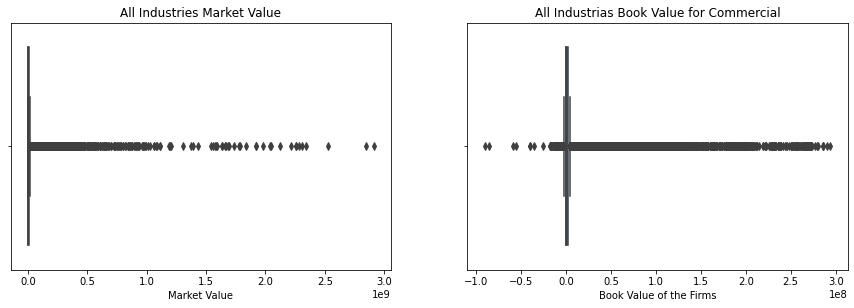

In [564]:
# Representación para todas las industrias del valor de mercado y valor contable
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

sns.boxplot(x="Market Value",data=US_Firms, ax=ax1).set_title("All Industries Market Value")
sns.boxplot(x="Book Value of the Firms",data=US_Firms, ax=ax2).set_title("All Industrias Book Value for Commercial")

In [548]:
# Para cada industria valor de mercado y valor contable
print('Industria            ','Valor de mercado', ' Valor contable')
print('Commercial :          ', round(comercial["Market Value"].median(),3),
                            '     ',
                            round(comercial["Book Value of the Firms"].median(),3))
print('Services :            ', round(services["Market Value"].median(),3),
                            '     ',
                            round(services["Book Value of the Firms"].median(),3))
print('Financial Services :  ', round(financial["Market Value"].median(),3),
                            '     ',
                            round(financial["Book Value of the Firms"].median(),3))
print('Manufacturing :       ',  round(manufacturing["Market Value"].median(),3),
                            '      ',
                            round(manufacturing["Book Value of the Firms"].median(),3))

Industria             Valor de mercado  Valor contable
Commercial :           2083817.971       723936.0
Services :             2184463.519       544419.0
Financial Services :   1563695.938       893833.0
Manufacturing :        1190025.11        363070.5


Text(0.5, 1.0, 'Book Value for Commercial')

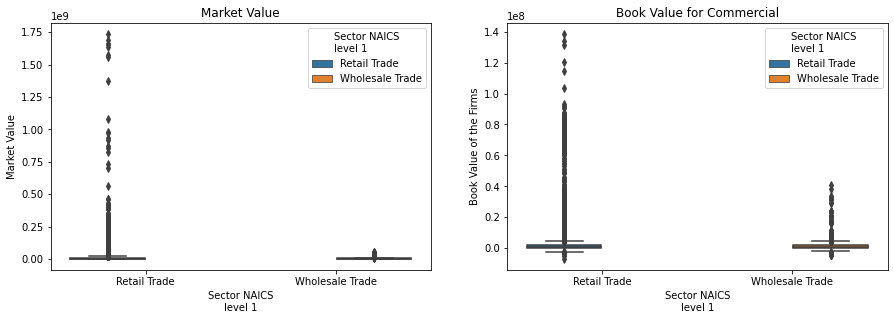

In [552]:
# Representación industria comercial del valor de mercado y valor contable
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

sns.boxplot(x="Sector NAICS\nlevel 1",y="Market Value",data=comercial, hue="Sector NAICS\nlevel 1",ax=ax1).set_title("Market Value")
sns.boxplot(x="Sector NAICS\nlevel 1",y="Book Value of the Firms",data=comercial, hue="Sector NAICS\nlevel 1",ax=ax2).set_title("Book Value for Commercial")

Text(0.5, 1.0, 'Book Value for Services')

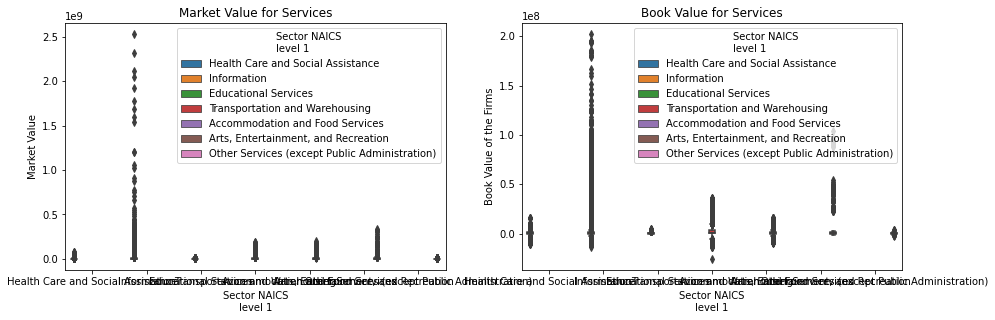

In [554]:
# Representación industria de servicios del valor de mercado y valor contable
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

sns.boxplot(x="Sector NAICS\nlevel 1",y="Market Value",data=services, hue="Sector NAICS\nlevel 1",ax=ax1).set_title("Market Value for Services")
sns.boxplot(x="Sector NAICS\nlevel 1",y="Book Value of the Firms",data=services, hue="Sector NAICS\nlevel 1",ax=ax2).set_title("Book Value for Services")

Text(0.5, 1.0, 'Book Value for Financial Services')

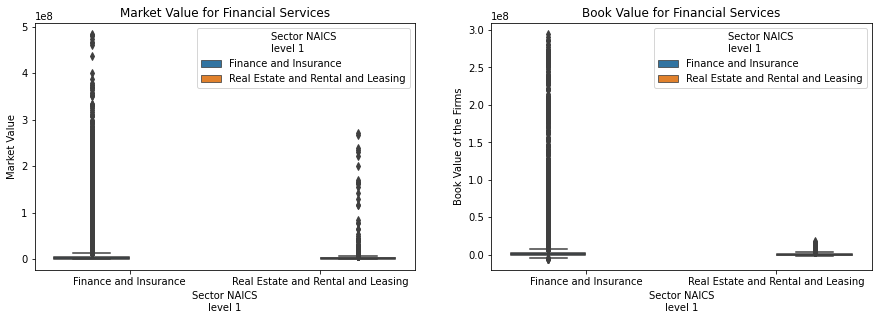

In [555]:
# Representación industria de servicios financieros del valor de mercado y valor contable
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

sns.boxplot(x="Sector NAICS\nlevel 1",y="Market Value",data=financial, hue="Sector NAICS\nlevel 1",ax=ax1).set_title("Market Value for Financial Services")
sns.boxplot(x="Sector NAICS\nlevel 1",y="Book Value of the Firms",data=financial, hue="Sector NAICS\nlevel 1",ax=ax2).set_title("Book Value for Financial Services")

Text(0.5, 1.0, 'Book Value for Manufacturing')

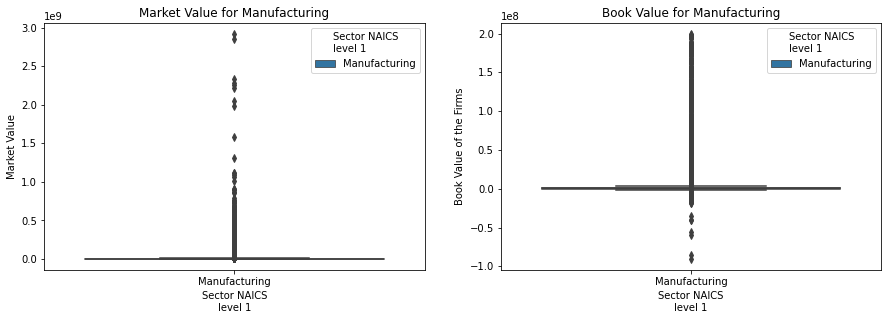

In [557]:
# Representación industria de manufactura del valor de mercado y valor contable
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

sns.boxplot(x="Sector NAICS\nlevel 1",y="Market Value",data=manufacturing, hue="Sector NAICS\nlevel 1",ax=ax1).set_title("Market Value for Manufacturing")
sns.boxplot(x="Sector NAICS\nlevel 1",y="Book Value of the Firms",data=manufacturing, hue="Sector NAICS\nlevel 1",ax=ax2).set_title("Book Value for Manufacturing")

---

Para cada sector (y para todos los sectores)
>###### ¿Qué puede decir sobre el margen de beneficio de las empresas? 
>###### a) estadísticas descriptivas del margen de beneficios 
>###### b) gráfico(s) para ilustrar cómo cambia el margen de beneficios entre las industrias.
###### **RESPUESTA.**

In [ ]:
# Analisis descriptivo
US_Firms['Profit Margin'].describe()
US_Firms["Profit Margin"].groupby(["firm"]).last().plot()

In [ ]:
# comercial['Profit Margin'].describe()
comercial["Profit Margin"].groupby(["firm"]).last().plot()

In [ ]:
# services['Profit Margin'].describe()
services["Profit Margin"].groupby(["firm"]).last().plot()

In [ ]:
# financial['Profit Margin'].describe()
financial["Profit Margin"].groupby(["firm"]).last().plot()

In [ ]:
# manufacturing['Profit Margin'].describe()
manufacturing["Profit Margin"].groupby(["firm"]).last().plot()

---

>###### ¿Cuáles son las 10 empresas estadounidenses más grandes en términos de valor de mercado y a qué distancia están del tamaño típico de una empresa estadounidense?
###### **RESPUESTA.**

top  = us_firms2022.sort_values('Book value of the firms', ascending=False).head(10) # Valor contable de la empresa
top10

In [ ]:
B_Firms = US_Firms.groupby(["firm"]).last() 
B_Firms = B_Firms.nlargest(10,"Market Value")
B_Firms

>###### ¿Cuáles son las 10 empresas estadounidenses más importantes en términos de valor contable y a qué distancia están del tamaño típico de una empresa estadounidense?
###### **RESPUESTA.**

In [ ]:
B_Firms = US_Firms.groupby(["firm"]).last() 
B_Firms = B_Firms.nlargest(10,"Book Value of the Firms")
B_Firms

---

Considerando todo el historial de datos financieros de todas las empresas:

>###### ¿Cómo se puede medir la rentabilidad de las empresas que se puede utilizar para comparar el rendimiento entre empresas de diferentes tamaños? Seleccionar y justificar al menos 3 medidas y mostrar estadísticas descriptivas
###### **RESPUESTA.**

>###### Calcular y explicar las ganancias por acción deflactadas por precio.
###### **RESPUESTA.**

*Modelado estadistico*

Utilizando su subconjunto de empresas que pertenecen a su sector, ¿qué factores (variables) podrían estar relacionados con la rentabilidad anual de las acciones en un trimestre en el futuro? Seleccione al menos 3 factores y explique brevemente. ¿por qué cree que podrían estar relacionados con la rentabilidad de las acciones?.
###### **RESPUESTA.**

In [ ]:
US_Firms["r"] = np.log(US_Firms["adjprice"]) - np.log(US_Firms["adjprice"].shift(4))
US_Firms[["adjprice","r"]]

In [ ]:
US_Firms["F1_ret"] = US_Firms["r"].shift(-1)
US_Firms[["r","F1_ret"]]

In [ ]:
#Earning per share:
US_Firms["EPSP"] = US_Firms['Net Income'] / US_Firms["sharesoutstanding"]

#Sales annual growth
US_Firms["Sales Annual G"] = (US_Firms["revenue"] / (US_Firms["revenue"].shift(-4)))-1

#Book to market ratio
US_Firms["Book to Market Ratio"] = (US_Firms["totalassets"] - US_Firms["totalliabilities"]) / (US_Firms["originalprice"] * US_Firms["sharesoutstanding"])

#To classify by size
US_Firms.sort_values("Market Value").groupby("q")
US_Firms["size"] = pd.cut(US_Firms["Market Value"], bins=3, labels = ["small","medium","big"])

US_Firms.head(0)

>###### Realice histogramas para cada factor/variable e interpretarlos
###### **RESPUESTA.**

In [ ]:
sns.histplot(x="F1_ret",data=US_Firms)

In [ ]:
sns.kdeplot(x="EPSP",data=US_Firms)


In [ ]:
sns.kdeplot(x="Sales Annual G",data=US_Firms)

In [ ]:
sns.kdeplot(x="Book to Market Ratio",data=US_Firms)

>###### Realice trazados para visualizar la posible relación que cada factor podría tener con la variable dependiente.
###### **RESPUESTA.**

In [ ]:
US_Firms[["F1_ret","EPSP","Sales Annual G","Book to Market Ratio"]].corr(method='pearson')

>###### Mostrar estadísticas descriptivas de estos factores.
###### **RESPUESTA.**

In [ ]:
US_Firms[["F1_ret","EPSP","Sales Annual G","Book to Market Ratio"]].corr(method='pearson').describe()

---

> Diseñe y ejecute un modelo de regresión múltiple para examinar si los factores seleccionados y las ganancias por acción deflactadas por precio pueden explicar/predecir las ganancias anuales de las acciones. Usted tiene que controlar para la industria y el tamaño de la firma. Para controlar estas variables, debe incluirlas como variables independientes adicionales en el modelo.
###### **RESPUESTA.**

>###### Las variables independientes deben estar en la escala correcta para poder comparar los valores de las variables entre diferentes firmas de cualquier tamaño.
###### **RESPUESTA.**

>###### Para cada variable independiente debe comprobar si hay valores atípicos y realizar los ajustes correspondientes para evitar resultados no fiables en el modelo de regresión.
###### **RESPUESTA.**

>###### Debe comprobar si existen posibles problemas de multicolinealidad. Explique brevemente qué es multicolinealidad, ejecute e interprete la prueba correspondiente.
###### **RESPUESTA.**

> Interpretar el modelo

>###### Interpretar los resultados de cada coeficiente (beta y su significación estadística)
###### **RESPUESTA.**

>###### Interpretar el R-cuadrado del modelo
###### **RESPUESTA.**

> Ajustes a su modelo. Si hay una o más variables independientes (factores o variables de control) que no son significativas, elimínelas del modelo. Usted tiene que ejecutar e interpretar su modelo final.

In [ ]:
import statsmodels.api as sm
from scipy.stats.mstats import winsorize
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [506]:
winsorize(US_Firms["F1_ret"], limits=[0.1, 0.55], inplace=True,nan_policy='propagate')
winsorize(US_Firms["EPSP"], limits=[0.1, 0.53], inplace=True,nan_policy='propagate')
winsorize(US_Firms["Sales Annual G"], limits=[0.1, 0.57], inplace=True,nan_policy='propagate')
winsorize(US_Firms["Book to Market Ratio"], limits=[0.1, 0.53], inplace=True,nan_policy='propagate')

masked_array(data=[0.37618763, 0.48321566, 0.42599138, ..., 0.4340675 ,
                   0.27773814, 4.65341297],
             mask=False,
       fill_value=1e+20)

In [507]:
# Verificar valores nulos 
print(US_Firms["F1_ret"].isnull().sum())
print(US_Firms["EPSP"].isnull().sum())
print(US_Firms["Sales Annual G"].isnull().sum())
print(US_Firms["Book to Market Ratio"].isnull().sum())

0
0
0
0


<AxesSubplot:xlabel='Sales Annual G'>

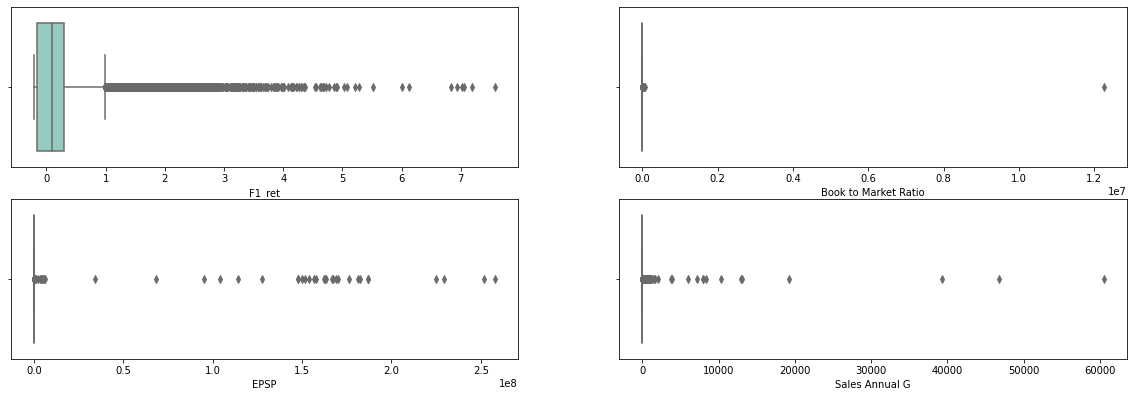

In [490]:
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
sns.boxplot(x="F1_ret",data=US_Firms,palette='Set3',ax=ax1)
sns.boxplot(x="Book to Market Ratio",data=US_Firms,palette='Set3',ax=ax2)
sns.boxplot(x="EPSP",data=US_Firms,palette='Set3',ax=ax3)
sns.boxplot(x="Sales Annual G",data=US_Firms, palette='Set3',ax=ax4)


In [491]:
US_Firms[["F1_ret","EPSP","Sales Annual G","Book to Market Ratio"]].describe()

,F1_ret,EPSP,Sales Annual G,Book to Market Ratio
count,146927.000,155408.000,141864.000,152754.000
mean,0.136,30137.808,inf,81.571
std,0.364,2283730.639,NaN,31340.318
min,-0.215,-0.097,-0.182,0.198
25%,-0.166,-0.043,-0.167,0.229
50%,0.085,0.296,-0.062,0.446
75%,0.293,0.804,0.032,0.759
max,7.577,257900000.000,inf,12248719.317


In [492]:
US_Firms[["F1_ret","EPSP","Sales Annual G","Book to Market Ratio"]].corr(method='pearson')

,F1_ret,EPSP,Sales Annual G,Book to Market Ratio
F1_ret,1.000,-0.003,0.002,-0.003
EPSP,-0.003,1.000,-0.000,0.006
Sales Annual G,0.002,-0.000,1.000,-0.000
Book to Market Ratio,-0.003,0.006,-0.000,1.000


In [508]:
vif = US_Firms[["F1_ret","EPSP","Sales Annual G","Book to Market Ratio"]]

vifData = pd.DataFrame()
np.any(~np.isfinite(vifData),axis=0)
vifData["feature"] = vif.columns

vifData["VIF"] = [variance_inflation_factor(vif.values, i) for i in range(len(vif.columns))]

vifData



,feature,VIF
0,F1_ret,10.359
1,EPSP,14.478
2,Sales Annual G,8.094
3,Book to Market Ratio,21.224


In [ ]:
# Getting x and y parameters for the model prediction
x = US_Firms[["EPSP","Sales Annual G","Book to Market Ratio"]]
y = US_Firms['F1_ret']

# Getting information to interpret a model
x = sm.add_constant(x)
results = sm.OLS(y, x, missing="drop").fit()
pred = results.predict(x)

print(results.summary())

In [ ]:
# Getting x and y parameters for the model prediction
x = US_Firms[["EPSP","Sales Annual G","Book to Market Ratio"]]
y = US_Firms['F1_ret']

# Getting information to interpret a model
x = sm.add_constant(x)
results = sm.OLS(y, x, missing="drop").fit()
pred = results.predict(x)

print(results.summary())